##  Predicting Home Prices in Banglore

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
data = pd.read_csv("bengaluru_house_prices.csv")

In [4]:
data.head(31)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.shape

(13320, 9)

In [7]:
#Count of duplicated rows
data[data.duplicated()].shape

(529, 9)

In [8]:
df_1= data.drop_duplicates()

In [9]:
#Count of duplicated rows
df_1[df_1.duplicated()].shape

(0, 9)

In [10]:
df_1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [11]:
# Drop  null value's 
df_2 = df_1.dropna()
df_2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
df_2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7144 non-null   object 
 1   availability  7144 non-null   object 
 2   location      7144 non-null   object 
 3   size          7144 non-null   object 
 4   society       7144 non-null   object 
 5   total_sqft    7144 non-null   object 
 6   bath          7144 non-null   float64
 7   balcony       7144 non-null   float64
 8   price         7144 non-null   float64
dtypes: float64(3), object(6)
memory usage: 558.1+ KB


In [14]:
df_2.shape

(7144, 9)

In [15]:
columns = ['area_type','balcony']
# Count all unique values in the specific columns
value_counts = {column: df_2[column].value_counts() for column in columns}
value_counts

{'area_type': Super built-up  Area    5672
 Built-up  Area          1152
 Plot  Area               268
 Carpet  Area              52
 Name: area_type, dtype: int64,
 'balcony': 2.0    2934
 1.0    2836
 3.0     973
 0.0     401
 Name: balcony, dtype: int64}

In [16]:
df_2 = df_2.drop(['area_type','society','balcony','availability'],axis='columns')
df_2.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00


In [17]:
df_2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00
...,...,...,...,...,...
13308,Bannerghatta Road,3 BHK,1527,3.0,142.00
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


## Feature Engineering 
##### size column

In [18]:
df_2['bhk'] = df_2['size'].apply(lambda x: int(x.split(' ')[0]))
df_2.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [19]:
columns = ['bhk']
value_counts = {column: df_2[column].value_counts() for column in columns}
value_counts

{'bhk': 2     3248
 3     2989
 4      524
 1      349
 5       25
 6        6
 11       1
 9        1
 7        1
 Name: bhk, dtype: int64}

In [20]:
df_2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4
...,...,...,...,...,...,...
13308,Bannerghatta Road,3 BHK,1527,3.0,142.00,3
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


### explore total_sqtf 

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df_2[~df_2['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2
850,Bannerghatta Road,2 BHK,1115 - 1130,2.0,58.935,2


In [22]:
def convert_sqf_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
                
    try:
        return float(x)
    except:
        return None

In [23]:
df3 = df_2.copy()

In [24]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4
...,...,...,...,...,...,...
13308,Bannerghatta Road,3 BHK,1527,3.0,142.00,3
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


In [25]:
df3.total_sqft = df3.total_sqft.apply(convert_sqf_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2
14,Sarjapur,3 Bedroom,2250.0,3.0,148.00,3
15,Mysore Road,2 BHK,1175.0,2.0,73.50,2
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.00,3
17,Raja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.00,3


In [26]:
df4=df3.copy()

## Feature Engineering
#### price column

In [27]:
df4['Price_Per_sqft'] = df4['price']*100000 / df4['total_sqft'] ##
df4.head()

,location,size,total_sqft,bath,price,bhk,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [28]:
df4.to_csv("bhp.csv",index=False)

## Examine Locations

In [29]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield            382
Sarjapur  Road        297
Electronic City       231
Thanisandra           209
Kanakpura Road        195
                     ... 
3rd Phase JP Nagar      1
1 Giri Nagar            1
Chikkabidarakallu       1
Mailasandra             1
Abshot Layout           1
Name: location, Length: 625, dtype: int64

In [30]:
location_stats.values.sum()

7129

In [31]:
len(location_stats[location_stats>10])

139

In [32]:
len(location_stats[location_stats<=10])

486

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle           10
Pattandur Agrahara     10
Prithvi Layout         10
Sector 2 HSR Layout    10
Marsur                 10
                       ..
3rd Phase JP Nagar      1
1 Giri Nagar            1
Chikkabidarakallu       1
Mailasandra             1
Abshot Layout           1
Name: location, Length: 486, dtype: int64

In [34]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

140

In [35]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(7089, 7)

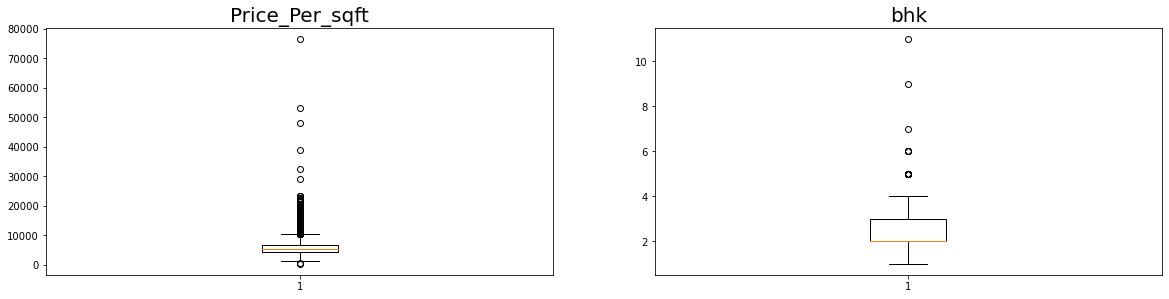

In [36]:
# Create a boxplot for each variable to check the distribution of data
plt.figure(figsize=(20,10))
# create a box plot
plt.subplot(2,2,1)
plt.boxplot(x='Price_Per_sqft',data=df5)
plt.title('Price_Per_sqft',fontsize=20)

plt.subplot(2,2,2)
plt.boxplot(x='bhk',data=df5)
plt.title('bhk',fontsize=20)
plt.show()

In [37]:
df5

,location,size,total_sqft,bath,price,bhk,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...
13308,Bannerghatta Road,3 BHK,1527.0,3.0,142.00,3,9299.279633
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


<AxesSubplot:xlabel='bhk', ylabel='Price_Per_sqft'>

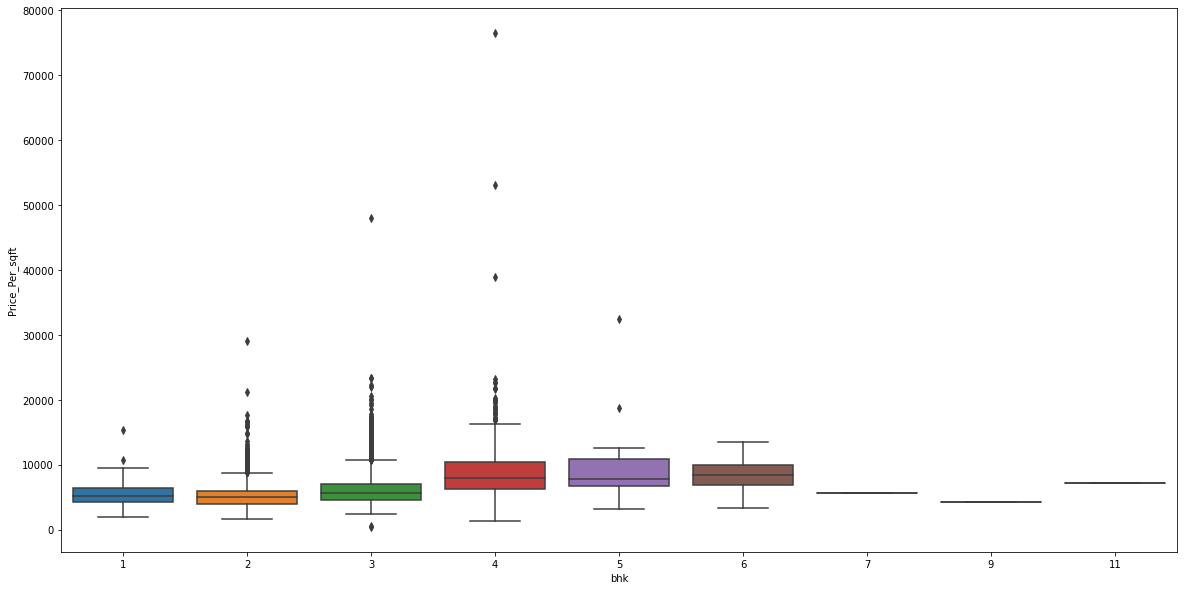

In [38]:
# Boxplot for ever
plt.figure(figsize=(20,10))
sns.boxplot(x="bhk",y="Price_Per_sqft",data=df5)

In [39]:
df5.Price_Per_sqft.describe()

count     7089.000000
mean      5886.037797
std       2738.814973
min        371.428571
25%       4307.692308
50%       5349.579832
75%       6713.554987
max      76530.612245
Name: Price_Per_sqft, dtype: float64

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_Per_sqft)
        st = np.std(subdf.Price_Per_sqft)
        reduced_df = subdf[(subdf.Price_Per_sqft>(m-st)) & (subdf.Price_Per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(5522, 7)

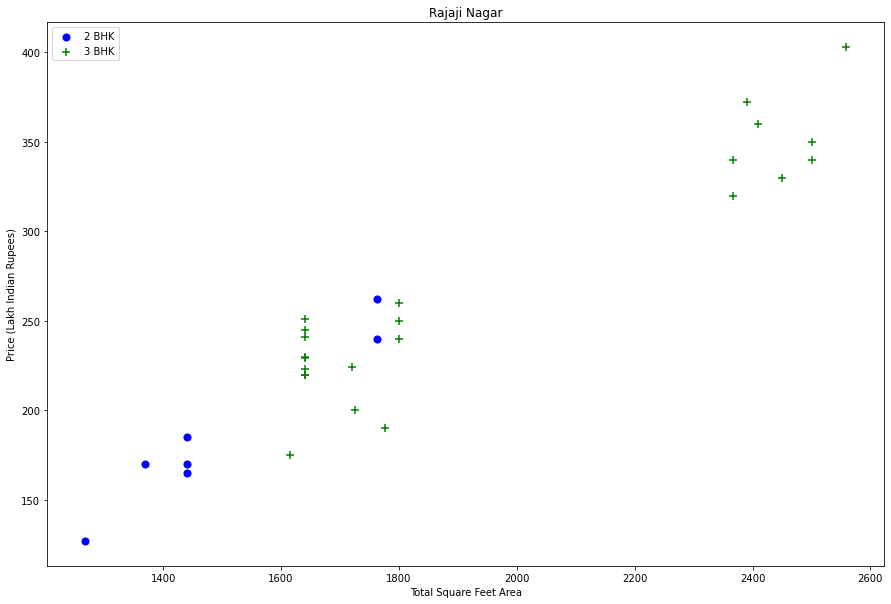

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

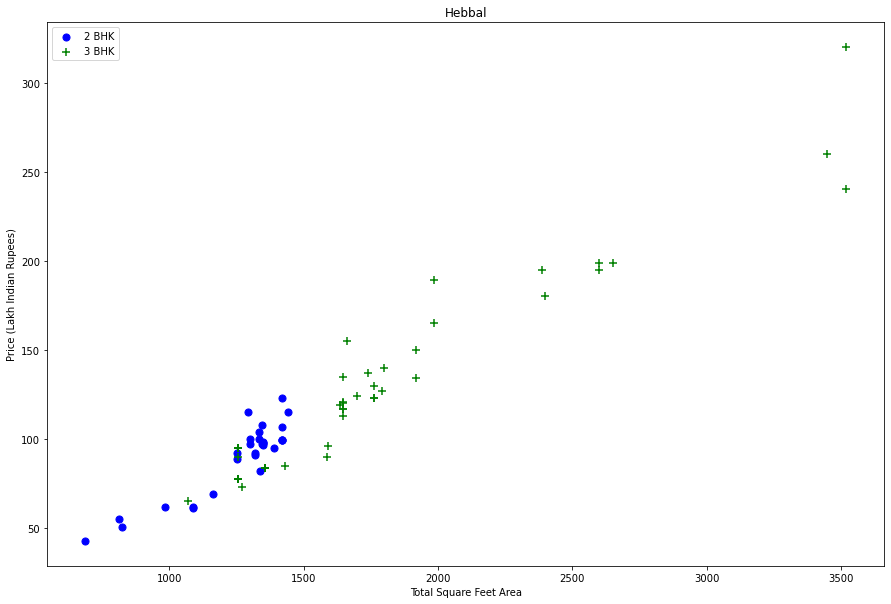

In [42]:
plot_scatter_chart(df6,"Hebbal")

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_sqft),
                'std': np.std(bhk_df.Price_Per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(3813, 7)

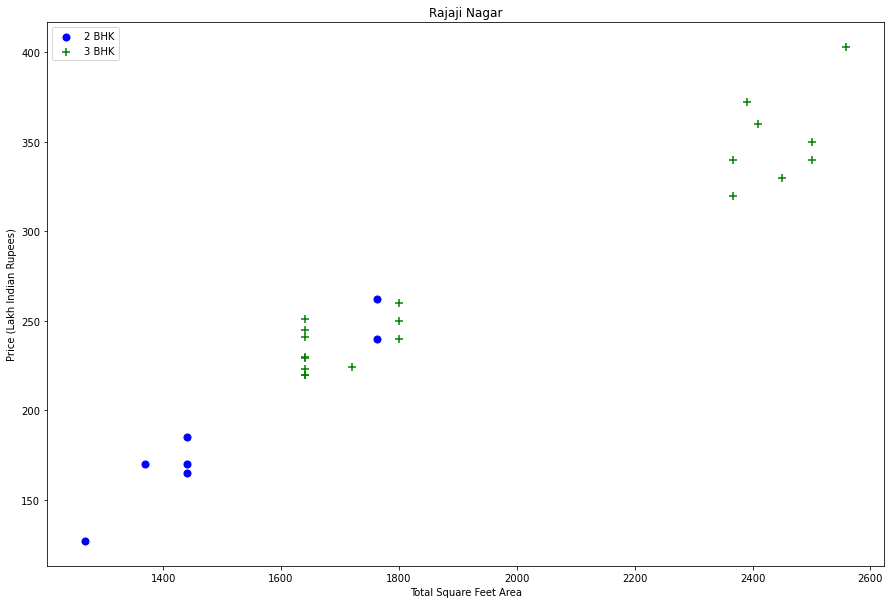

In [44]:
plot_scatter_chart(df7,"Rajaji Nagar")

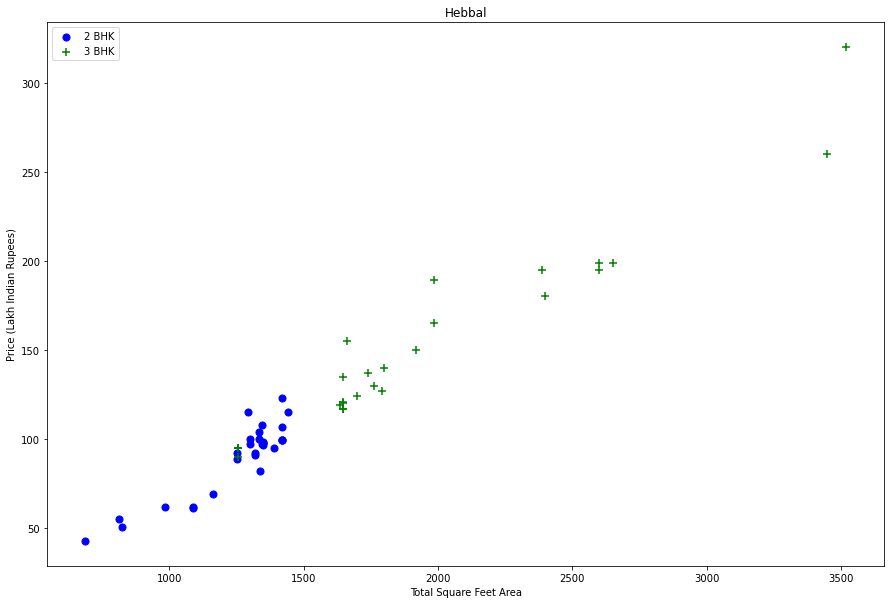

In [45]:
plot_scatter_chart(df7,"Hebbal")

#### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

## BARPLOT 

Text(0, 0.5, 'Count')

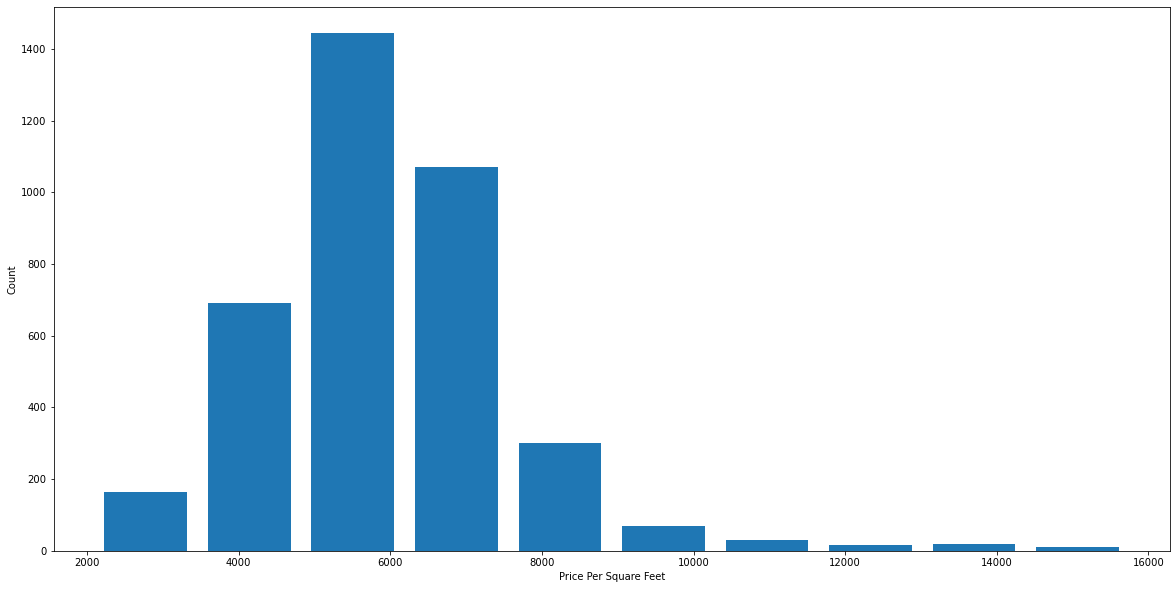

In [46]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_Per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'Count')

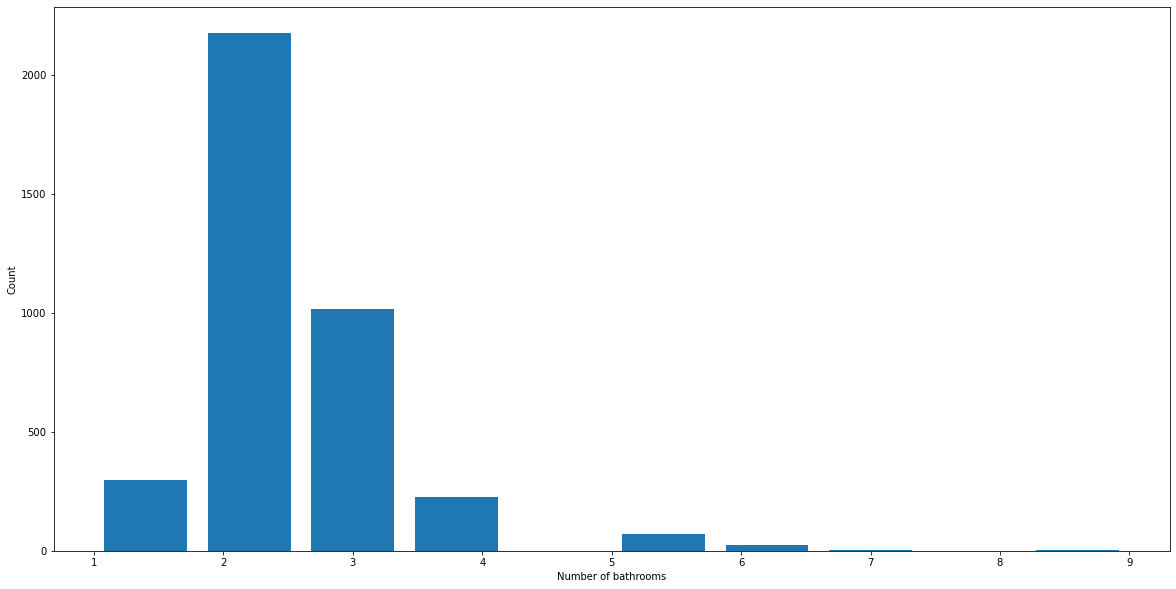

In [47]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

##### 2 and 3 bathroom has most count

In [48]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,Price_Per_sqft


In [49]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,Price_Per_sqft
3496,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4528,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(3773, 7)

In [51]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,Price_Per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


In [52]:
df9 = df8.drop(['size','Price_Per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2


###  one hot encoding on Location column


In [53]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,131.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1500.0,2.0,78.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5514,1155.0,2.0,64.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5515,1508.0,3.0,77.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,1095.0,2.0,57.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Buliding

In [57]:
df11.shape

(3773, 143)

In [58]:
x = df11.drop(['price'],axis='columns')
x
              

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1500.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5514,1155.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5515,1508.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,1095.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = df11.price

In [60]:
y

0       250.0
1       167.0
2       100.0
3        93.0
4       131.0
        ...  
5512     78.0
5514     64.0
5515     77.0
5517     57.0
5519     65.0
Name: price, Length: 3773, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [62]:
x_train.shape

(3018, 142)

In [63]:
y_train.shape

(3018,)

In [64]:
x_test.shape

(755, 142)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9297426540078214

In [66]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=3,selection='cyclic')
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8096265158393209

In [67]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor()
reg1.fit(x_train,y_train)
reg1.score(x_test,y_test)

0.8813173038790058

In [68]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]

In [69]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.97759308067954

In [70]:
predict_price('AECS Layout',2825,4,4)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175.8156644710312

## Pickle File

In [71]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)